In [1]:
!pip install tensorflow

In [27]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt



# Hidden Layer & Output Layer
import keras
from keras import layers


import warnings
warnings.filterwarnings("ignore")

In [3]:
train = "/content/drive/MyDrive/Dataset/CNN/Shoe Classification/train"
test = "/content/drive/MyDrive/Dataset/CNN/Shoe Classification/test"

In [5]:
import random
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [19]:
# Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
#test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Dataset/CNN/Shoe Classification/train",
                                                  target_size=(IMG_WIDTH, IMG_HEIGHT), # HEIGHT AND WIDTH

                                                 subset= 'training',
                                               #  batch_size = 100, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'categorical')
test_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Dataset/CNN/Shoe Classification/train",
                                           target_size=(IMG_WIDTH, IMG_HEIGHT),

                                           #  batch_size = 15,
                                            class_mode = 'categorical',
                                            subset='validation')

Found 585 images belonging to 3 classes.
Found 193 images belonging to 3 classes.


In [20]:
training_set.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [21]:
labels = {value: key for key, value in training_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Boots
1 : Sandals
2 : Slippers


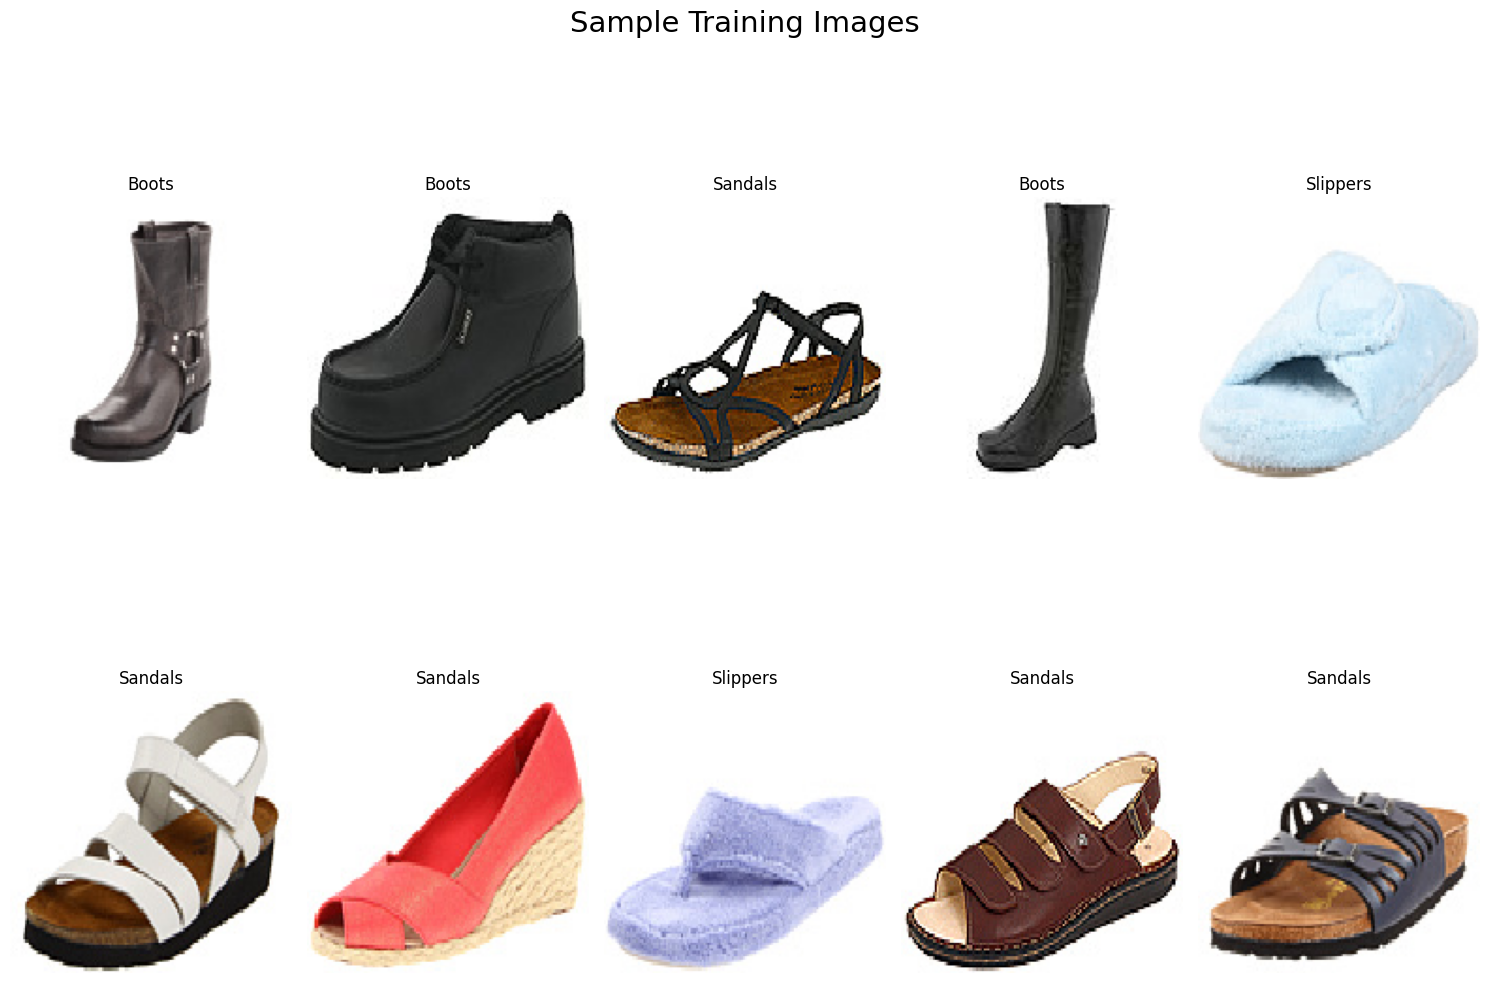

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(training_set[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [23]:
for image_batch, labels_batch in training_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32, 3)


In [24]:
#TRAINING THE CNN

In [28]:
# Initialising the CNN
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

model=tf.keras.models.Sequential()
model.add(layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [29]:
# Compiling the CNN
epochs = 12 # awalnya 20

tf.random.set_seed(1)
model.build(input_shape=(16, 102,136,3))
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 34, 34, 64)       

In [31]:
result = model.fit(training_set,
                   validation_data=test_set,
                   epochs=10)

Epoch 1/10
19/19 [==============================] - 45s 2s/step - loss: 1.0234 - accuracy: 0.4855 - val_loss: 0.8779 - val_accuracy: 0.7047
Epoch 2/10
19/19 [==============================] - 17s 908ms/step - loss: 0.6225 - accuracy: 0.7026 - val_loss: 0.5955 - val_accuracy: 0.6995
Epoch 3/10
19/19 [==============================] - 17s 880ms/step - loss: 0.4426 - accuracy: 0.8154 - val_loss: 0.4311 - val_accuracy: 0.7979
Epoch 4/10
19/19 [==============================] - 17s 907ms/step - loss: 0.3627 - accuracy: 0.8598 - val_loss: 0.3389 - val_accuracy: 0.8964
Epoch 5/10
19/19 [==============================] - 17s 870ms/step - loss: 0.3420 - accuracy: 0.8581 - val_loss: 0.3508 - val_accuracy: 0.8705
Epoch 6/10
19/19 [==============================] - 17s 913ms/step - loss: 0.3006 - accuracy: 0.8684 - val_loss: 0.3128 - val_accuracy: 0.8964
Epoch 7/10
19/19 [==============================] - 16s 855ms/step - loss: 0.2605 - accuracy: 0.9026 - val_loss: 0.2905 - val_accuracy: 0.8964
Ep

In [32]:
model.save('shoe_classifier.h5')

In [34]:
!pip install keras_preprocessing
from keras.models import load_model
from keras_preprocessing import image  # Now this import should work
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00


In [35]:
new_model = load_model("shoe_classifier.h5")

In [36]:
from PIL import Image
def model_output(dir_addr):
    my_img = image.load_img(dir_addr, target_size=(150,150))
    plt.imshow(my_img)
    plt.show()

    my_img = image.img_to_array(my_img)
    my_img = np.expand_dims(my_img, axis= 0)

    reverse_mapping = dict(zip([0, 1, 2], ['Boot', 'Sandal', 'Slippers']))

    def mapper(val):
        return reverse_mapping[val]

    pred = new_model.predict(my_img)
    value = np.argmax(pred)
    shoe_name = mapper(value)
    print("Prediction is {}.".format(shoe_name))

    print(str(pred)+'\n')

In [37]:
import os
os.chdir("/content/drive/MyDrive/Dataset/CNN/Shoe Classification/test")

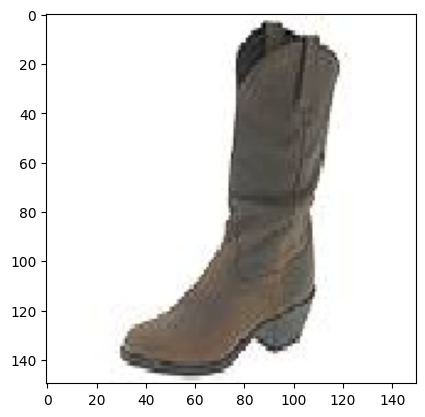

1/1 [==============================] - 0s 160ms/step
Prediction is Boot.
[[1. 0. 0.]]



In [38]:
model_output("/content/drive/MyDrive/Dataset/CNN/Shoe Classification/test/image (15).jpg")

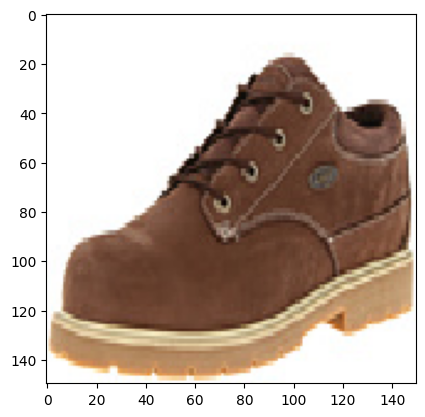

1/1 [==============================] - 0s 78ms/step
Prediction is Boot.
[[1. 0. 0.]]



In [40]:
model_output("/content/drive/MyDrive/Dataset/CNN/Shoe Classification/test/image (22).jpg")

In [41]:
#ACCURACY OF MODEL

In [42]:
score = model.evaluate(training_set,verbose=0)
print("Accuracy and loss of model-----------------------------------------------")
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Accuracy : {:.4f}'.format(score[1]))

Accuracy and loss of model-----------------------------------------------
Train Loss : 0.1776
Train Accuracy : 0.9504
